### Step 1: Import Libraries and csv files

In [2]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV file into a Pandas DataFrame
car_prices_df = pd.read_csv(Path("Resources/car_prices.csv"))

# Review the DataFrame
car_prices_df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Read the CSV file into a Pandas DataFrame
new_cars_df = pd.read_csv(Path("Resources/new_cars_prices.csv"))

# Review the DataFrame
new_cars_df.head()

# Read the CSV file into a Pandas DataFrame
used_cars_df = pd.read_csv(Path("Resources/used_car_prices.csv"))

# Review the DataFrame
used_cars_df.head()
new_cars_df.isnull().sum()
used_cars_df.isnull().sum()


In [4]:
# Check for Null Values
car_prices_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [5]:
car_prices_df.isnull().mean()*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [ ]:
car

In [17]:
#car_prices_df["make"] = car_prices_df["make"].fillna("0")
#car_prices_df.head()

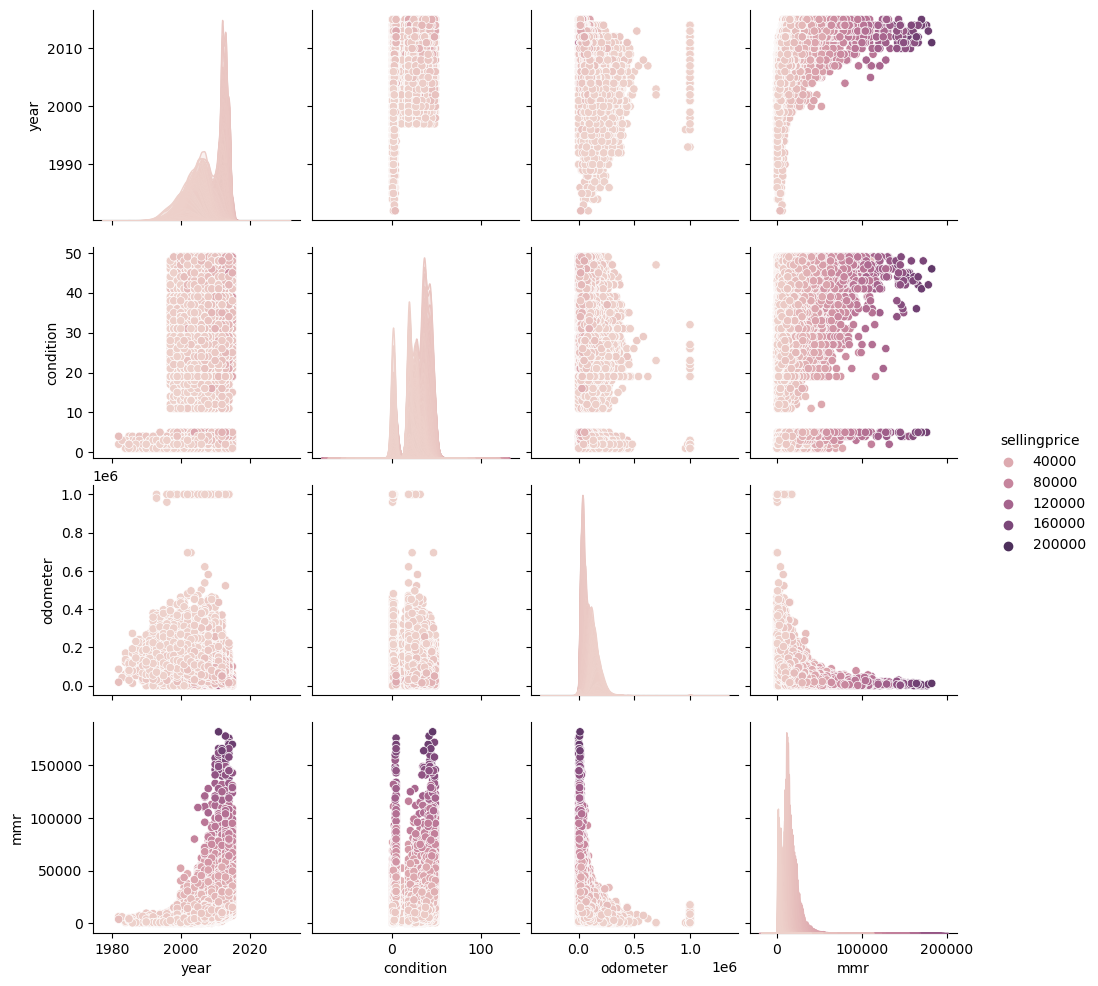

In [5]:
sns.pairplot(car_prices_df, hue="sellingprice")

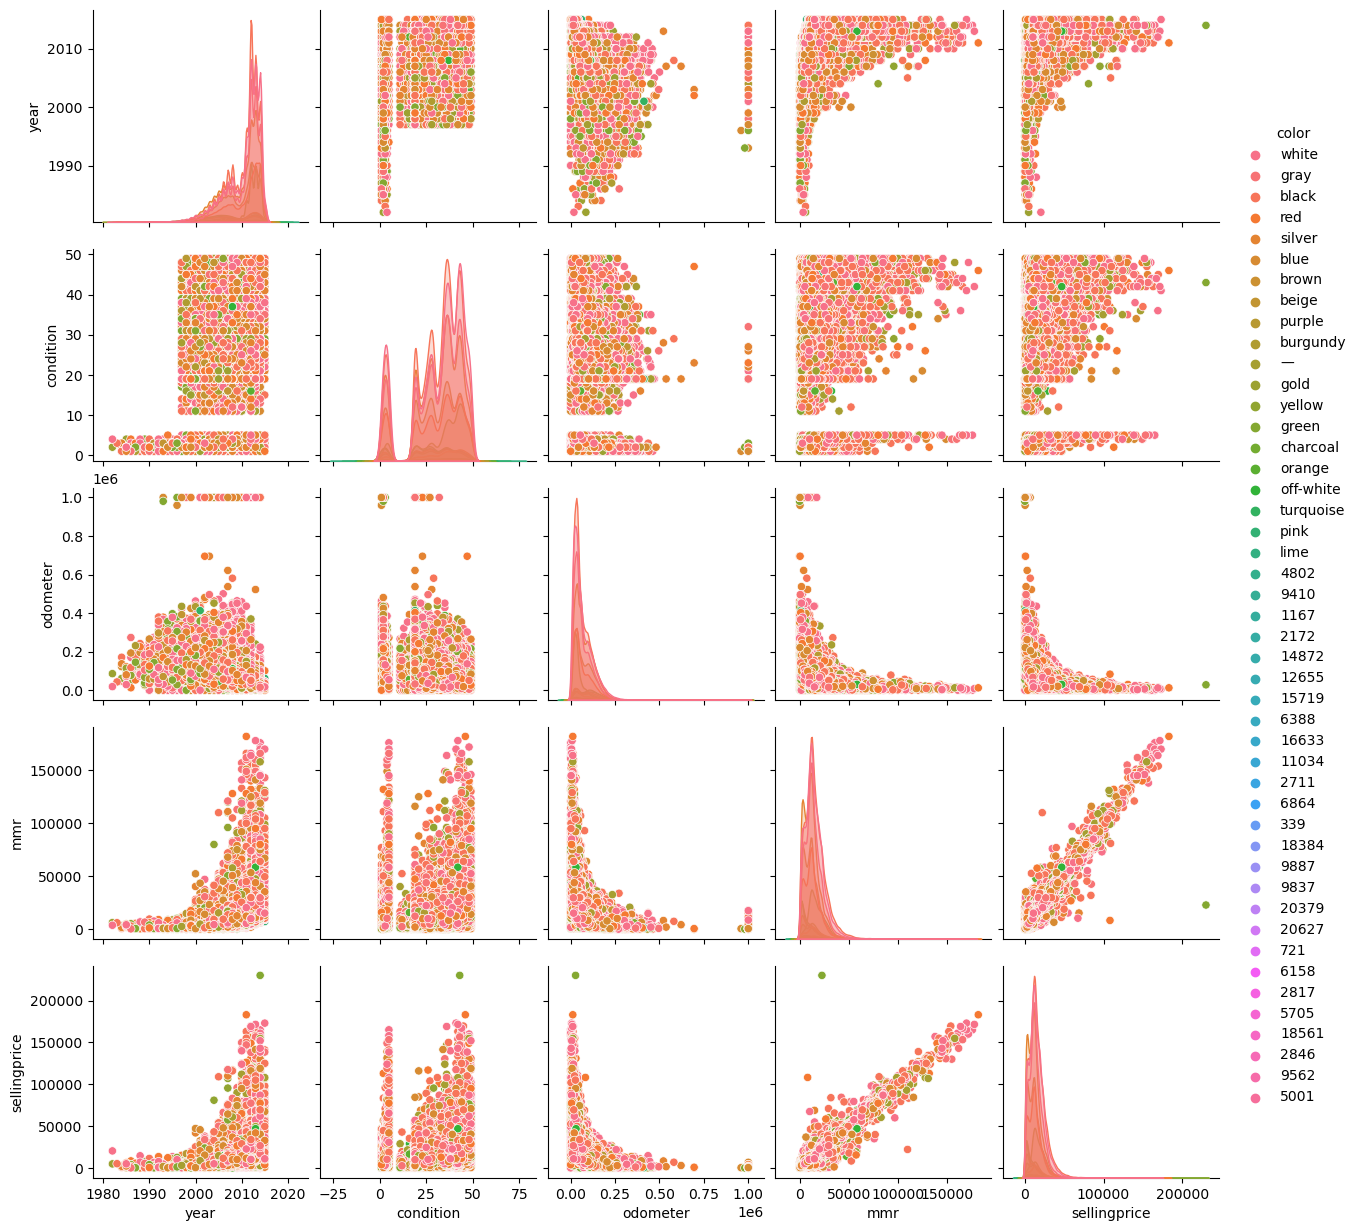

In [9]:
sns.pairplot(car_prices_df, hue="color")

In [12]:
car_prices_df.dropna(inplace=True)
car_prices_df= car_prices_df.drop(columns=['vin','saledate','seller'], axis=1)

In [8]:
x_vars= ["year","make"]
y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="sellingprice", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()


web-scraper-order    0
Car Model            0
Old Price            0
Price Change         0
New Price            0
date_range           0
dtype: int64

In [1]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

### Step 2: Exploratory Data Analysis

In [20]:
# Separate the data into target and features

# Separate the y variable, the target
y = car_prices_df["sellingprice"]

# Separate the X variable, the features
X = car_prices_df.drop(columns="sellingprice")

In [16]:
sns.FacetGrid(car_prices_df, col="make", row="mode")
